model agnostic

In [1]:
# !pip install pip install -U pyartemis

In [2]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
from time import time

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = main(retained=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute clean data: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 56 seconds
Elapsed time to compute Full process: 2 minutes and 11 seconds


In [4]:
# drop rows where 'YEAR MMS' is 1 or 10
data = data[data['YEAR MMS'] != 1]
data = data[data['YEAR MMS'] != 10]

In [5]:
# drop column YEAR MMS
data = data.drop(columns=['YEAR MMS'])

In [6]:
data = pd.get_dummies(data)

In [7]:
data.dropna(inplace=True)
data.shape

(37680, 334)

In [8]:
# Splitting the data into X and y
X = data[(data['outcome'] == 0) | (data['outcome'] == 3)].drop('outcome',axis=1)
X.columns = [str(col) for col in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 3)]['outcome']

In [9]:
# Balancing the data using SMOTE
X, y = smote(X, y)

y_train: 
3    24060
0    24060
Name: outcome, dtype: int64
Elapsed time to compute oversampling using SMOTE: 0 minutes and 1 seconds


In [10]:
# RF model
rf = RandomForestClassifier(class_weight='balanced')

rf.fit(X, y)

RandomForestClassifier(class_weight='balanced')

Fedmans H Statistics

In [11]:
# Get random selection of 100 observations

random.seed(42)
X_exp = random.choices(X.to_numpy(), k=100)
X_exp = pd.DataFrame(X_exp, columns=X.columns)

Unnormalised H-Statistic

In [12]:
h_stat_unnormalised = FriedmanHStatisticMethod(normalized=False)
t1 = time()
h_stat_unnormalised.fit(rf, X_exp, show_progress=True)
t2 = time()
print(time_e(t1, t2, 'Friedman H Statistic unnormalised'))

Calculating one vs all interactions: 100%|██████████| 333/333 [11:41<00:00,  2.11s/it]

Elapsed time to compute Friedman H Statistic unnormalised: 45 minutes and 34 seconds


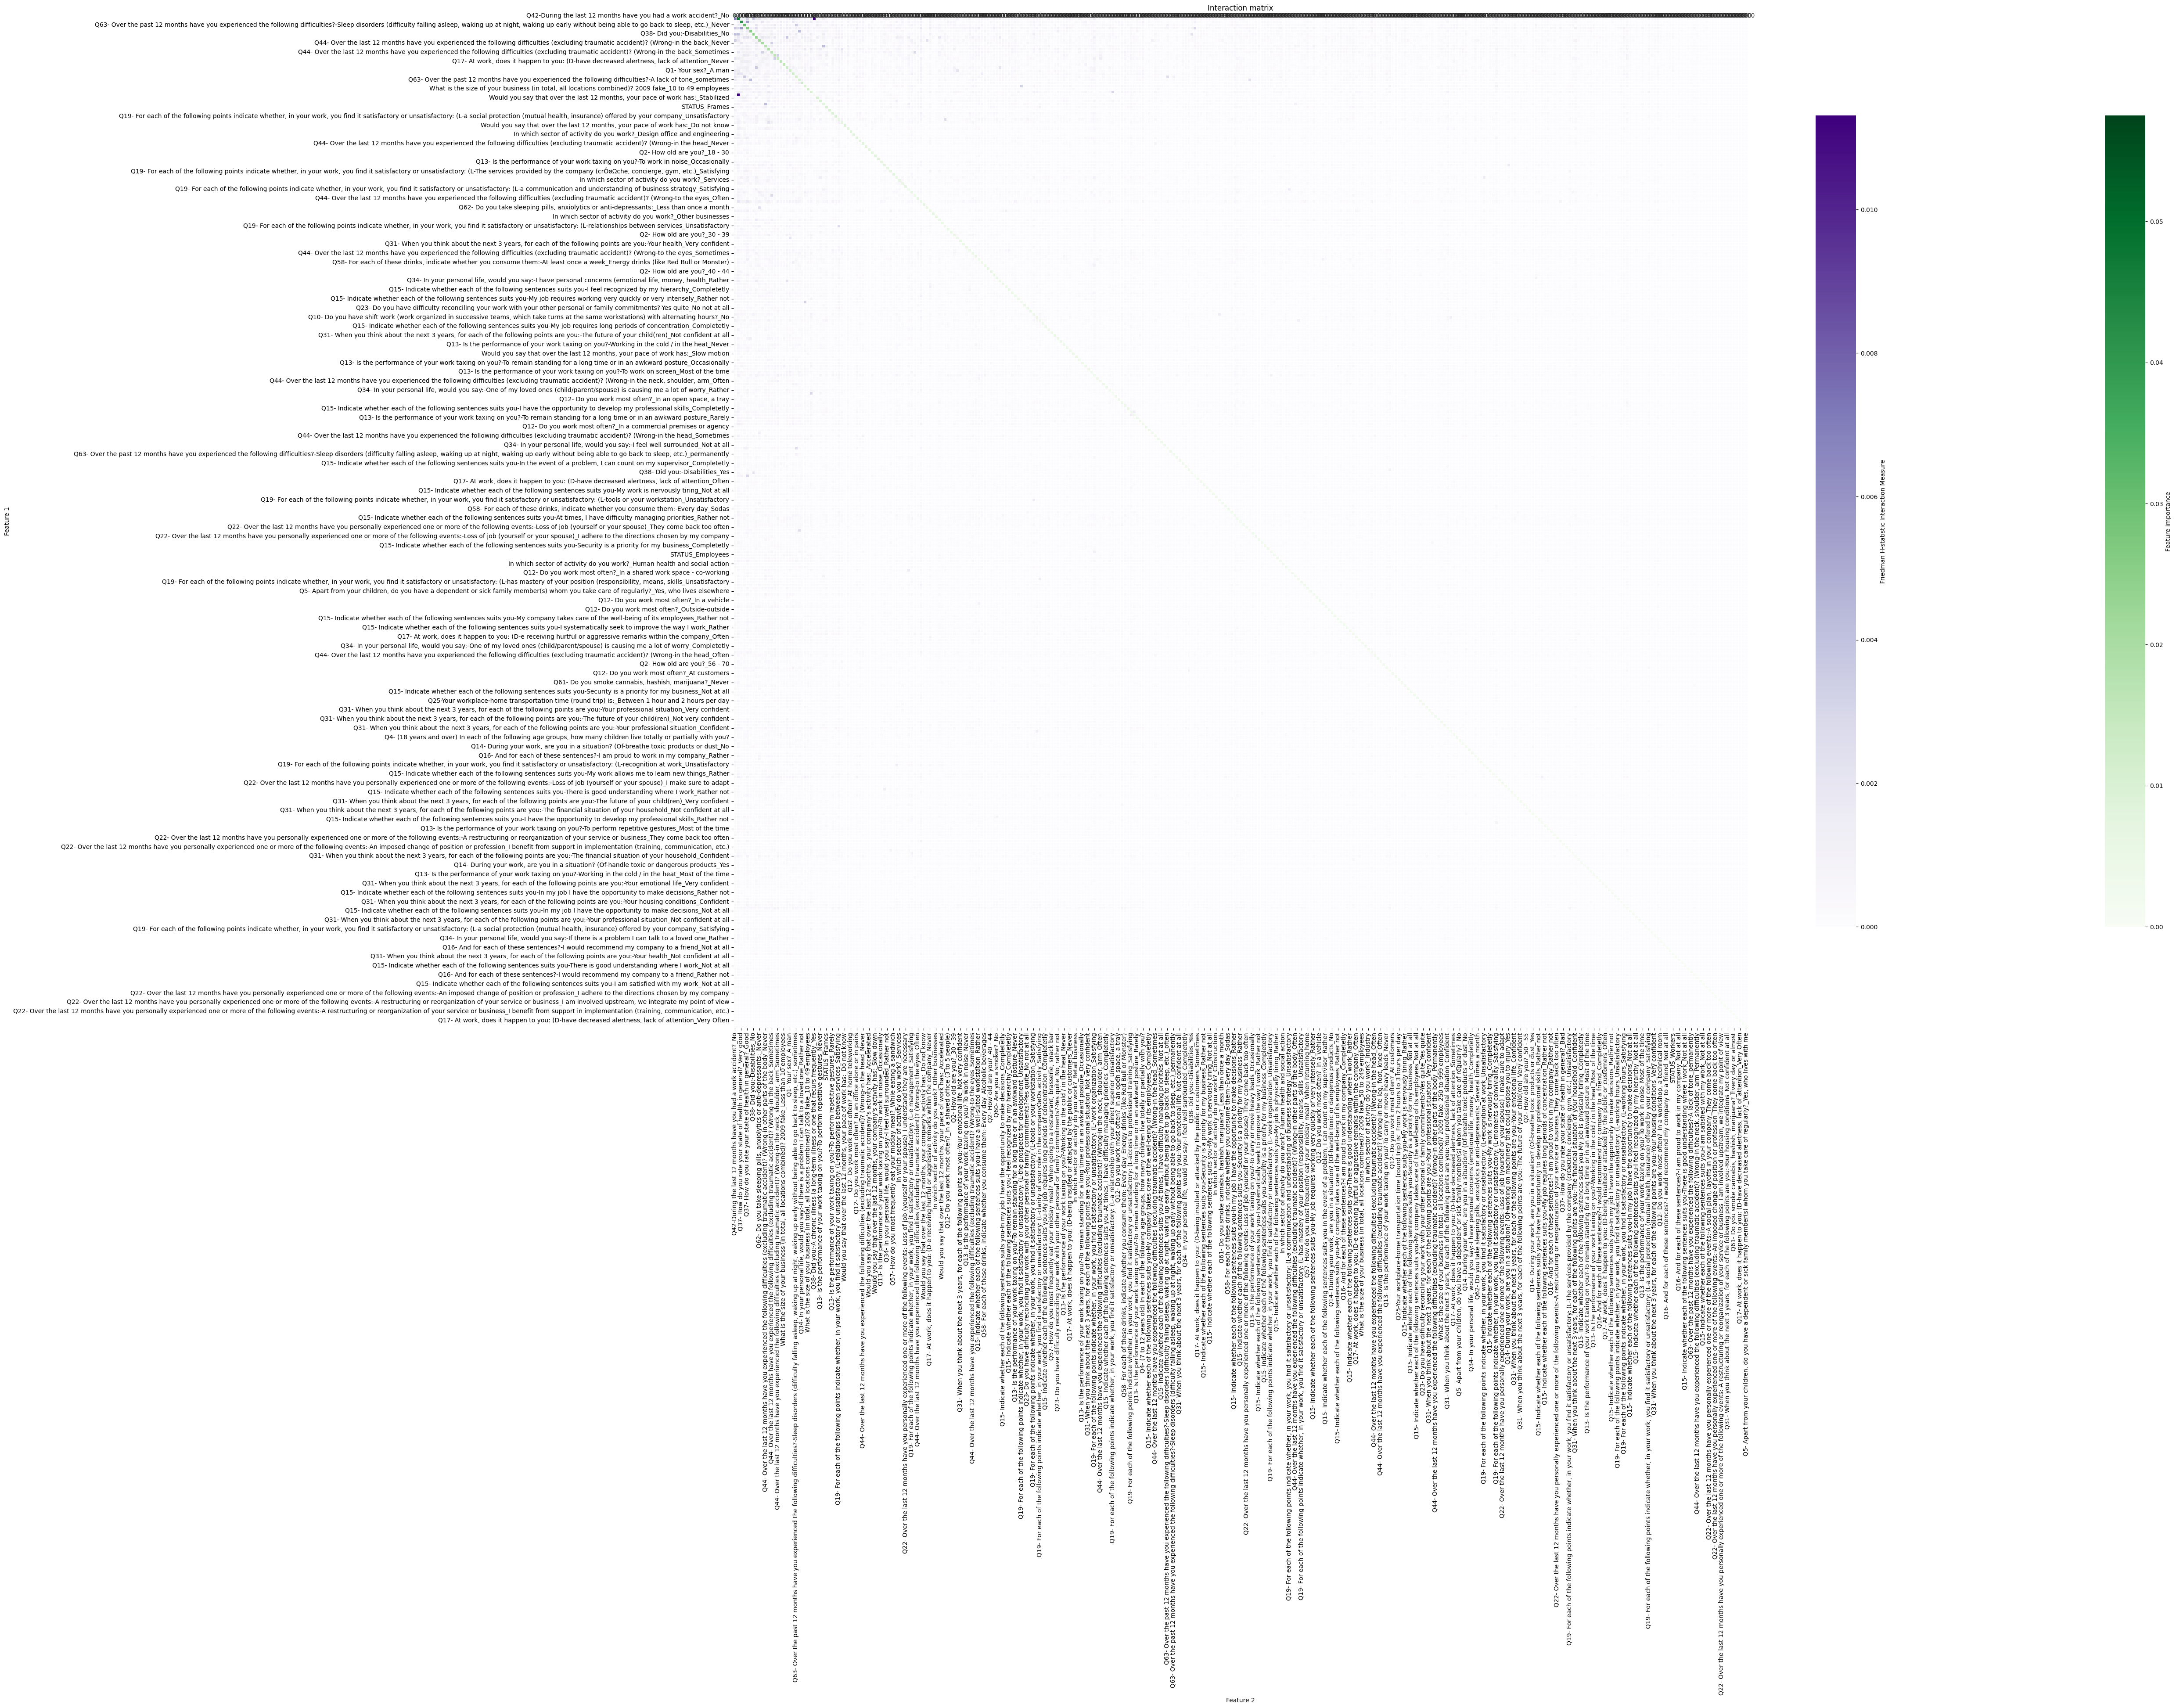

In [13]:
# Plot heatmap
fig, ax = plt.subplots(figsize=(50, 30))
h_stat_unnormalised.plot(ax=ax)

# save the plot
fig.savefig('outputs/01_02_03_hStat/hStat_heatmap_unnormalised.png', bbox_inches='tight')

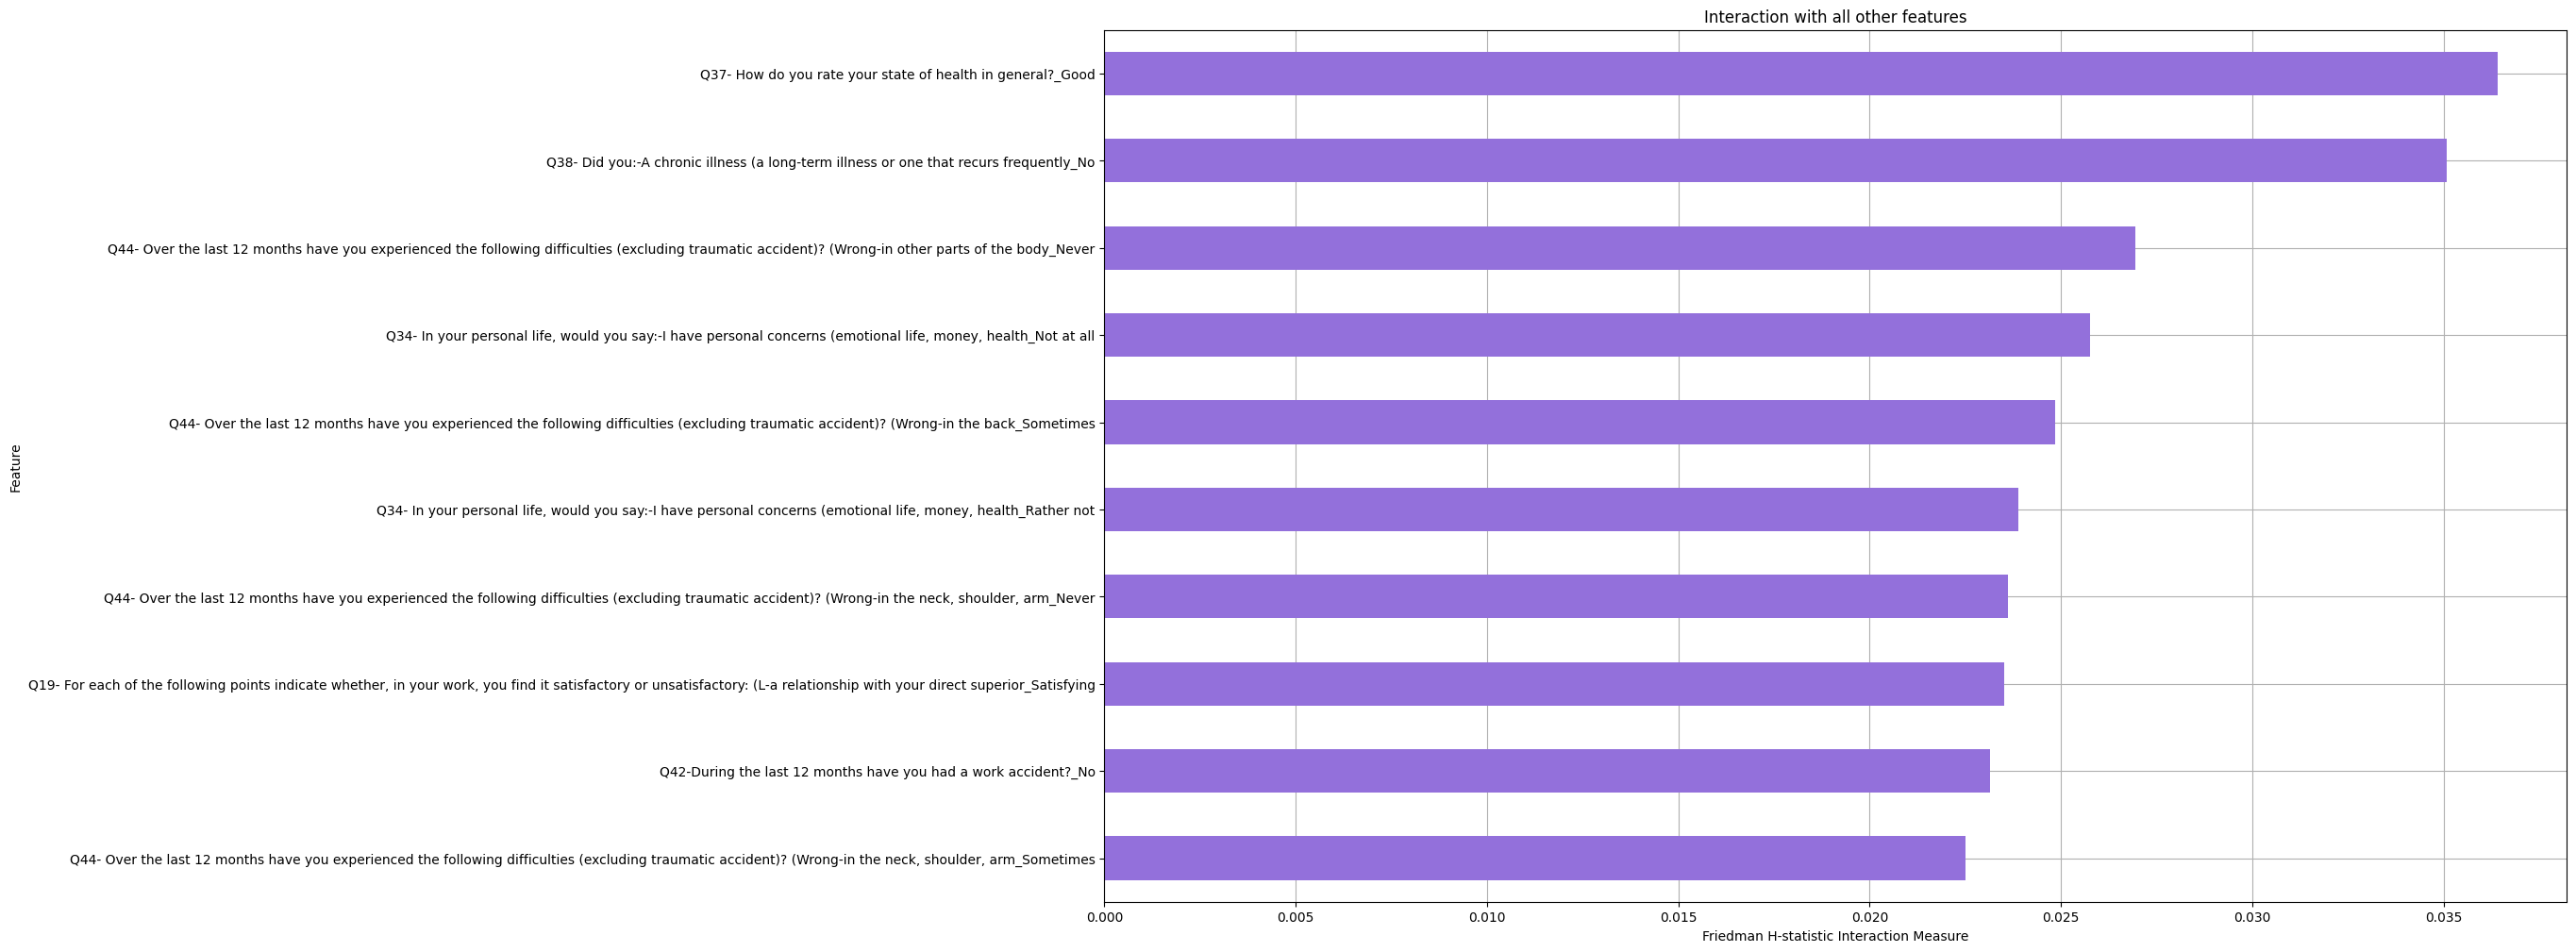

In [14]:
# Plot overall interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart_ova', ax=ax)

# save the plot
plt.savefig('outputs/01_02_03_hStat/overall_interactions_unnormalised.png', bbox_inches='tight')

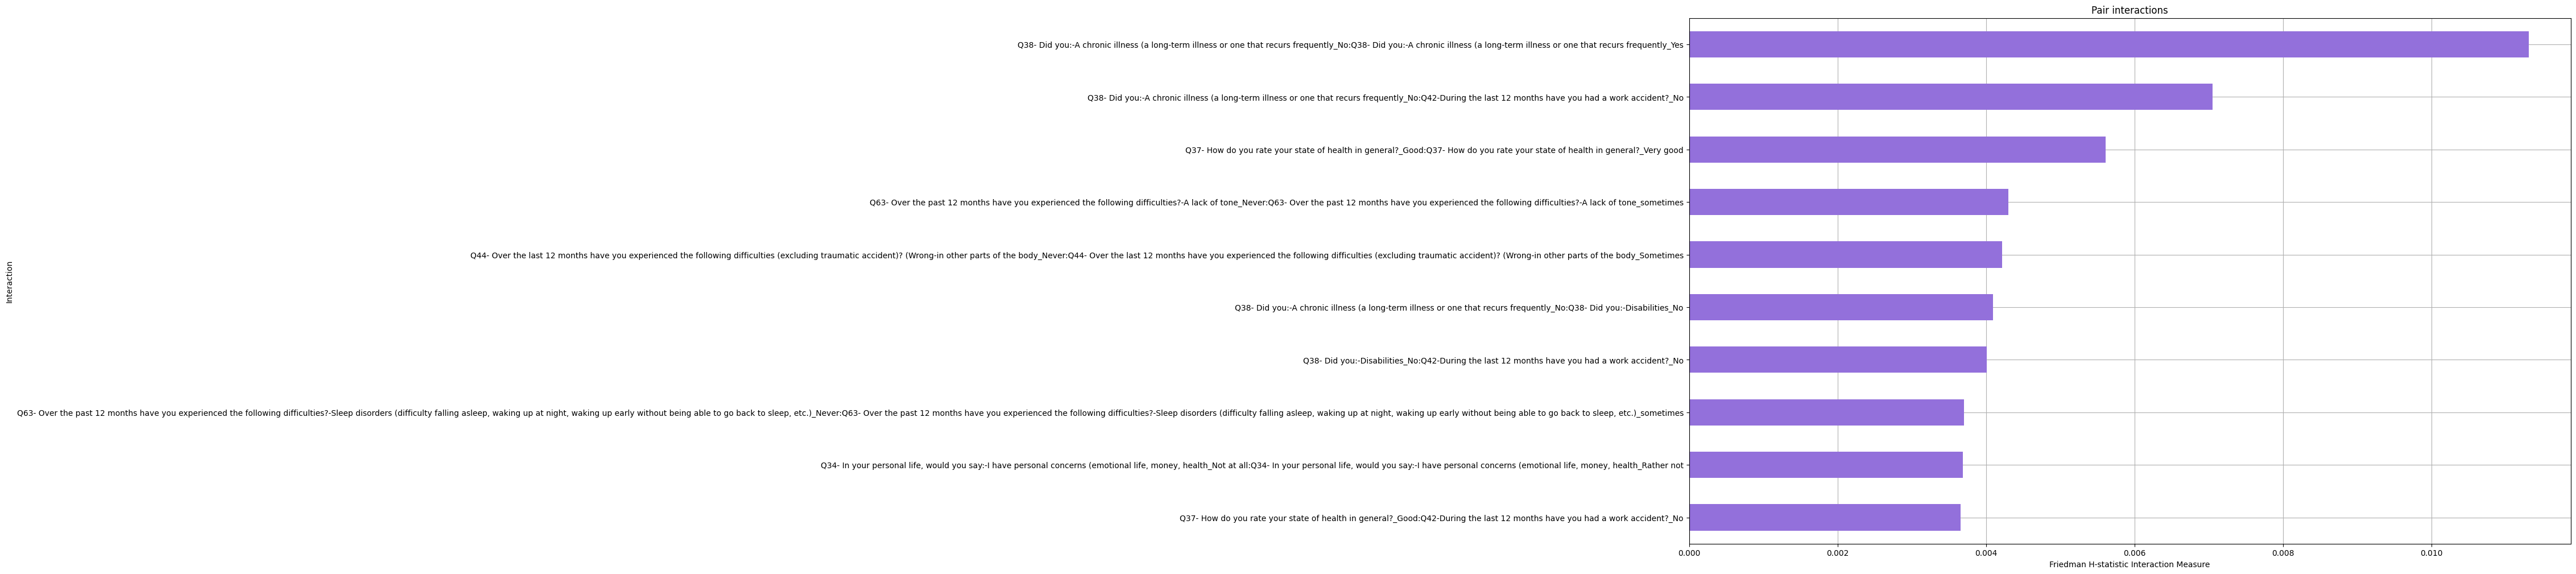

In [15]:
# Plot pairwise interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart', ax=ax)

# save the plot
plt.savefig('outputs/01_02_03_hStat/pairwise_interactions_unnormalised.png', bbox_inches='tight')

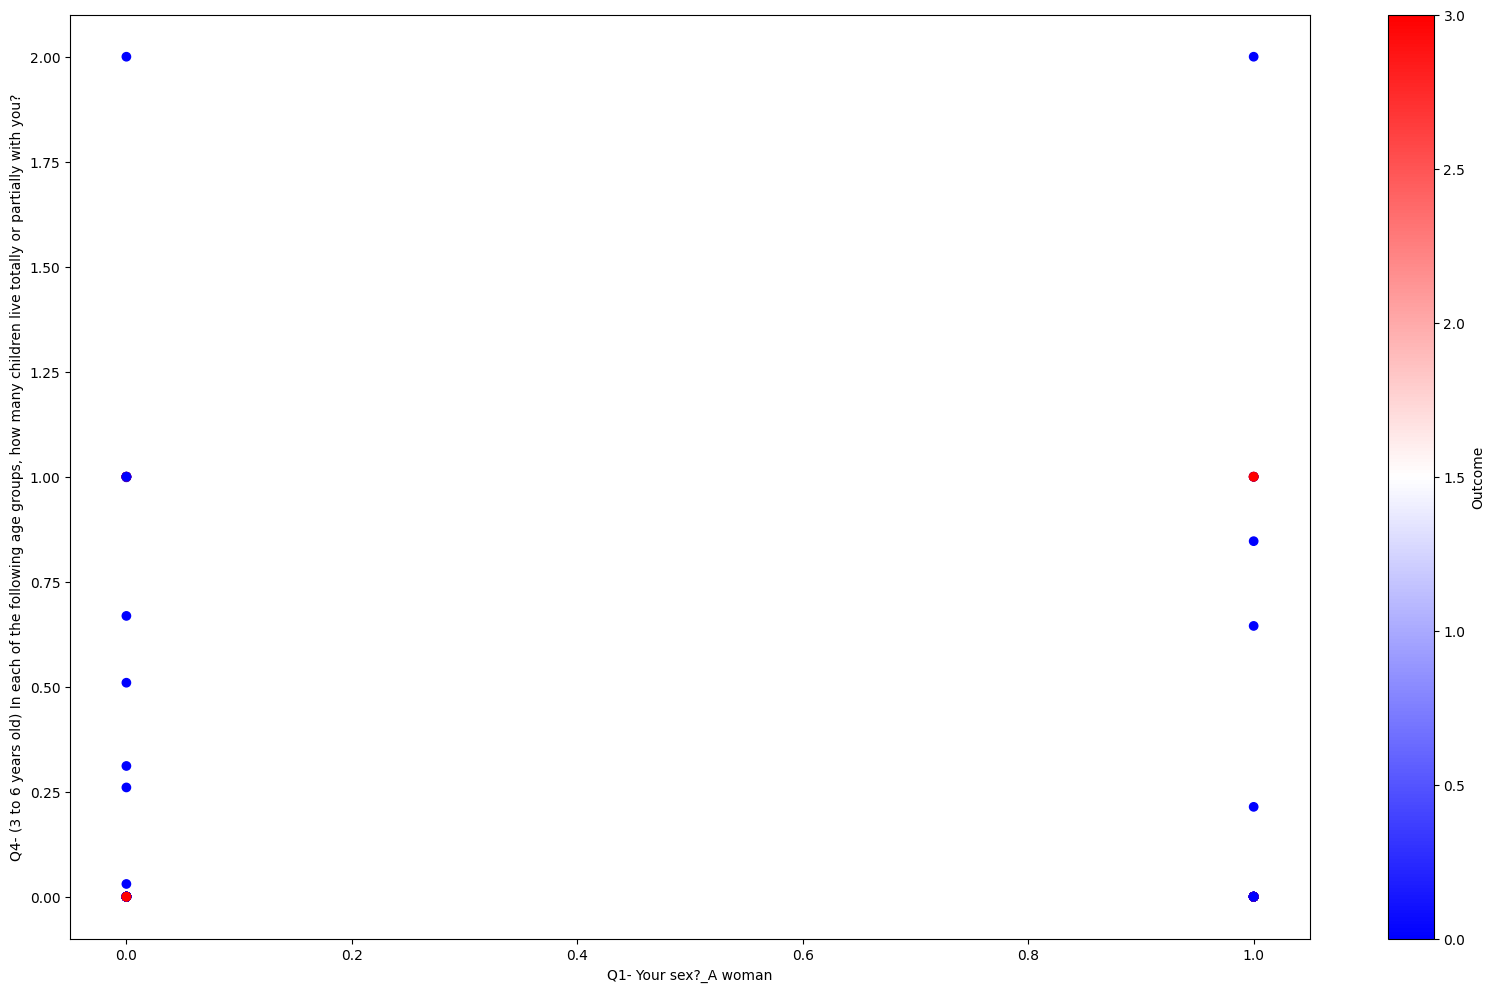

In [16]:
# Interaction between two features
fig, ax = plt.subplots(figsize=(20, 12))
plt.scatter(X_exp["Q1- Your sex?_A woman"], X_exp["Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?"], c=y[:100], cmap='bwr')
plt.colorbar(label='Outcome', orientation='vertical')
plt.xlabel("Q1- Your sex?_A woman")
plt.ylabel("Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?")
plt.savefig('outputs/01_02_03_hStat/interaction_between_two_features.png', bbox_inches='tight')
plt.show()

In [17]:
h_stat_unnormalised.feature_importance[0:20]

Feature  Importance
0   Q42-During the last 12 months have you had a w...     0.05750
1   Q38- Did you:-A chronic illness (a long-term i...     0.04700
2   Q37- How do you rate your state of health in g...     0.04210
3   Q63- Over the past 12 months have you experien...     0.03060
4   Q37- How do you rate your state of health in g...     0.02620
5   Q63- Over the past 12 months have you experien...     0.02530
6                       Q38- Did you:-Disabilities_No     0.02365
7   Q34- In your personal life, would you say:-I h...     0.02355
8   Q44- Over the last 12 months have you experien...     0.02010
9   Q62- Do you take sleeping pills, anxiolytics o...     0.02010
10  Q44- Over the last 12 months have you experien...     0.01855
11  Q44- Over the last 12 months have you experien...     0.01730
12  Q44- Over the last 12 months have you experien...     0.01715
13  Q44- Over the last 12 months have you experien...     0.01640
14  Q17- At work, does it happen to you: (D-have d...     0.01605
15  What is the size of your business (in total, a...     0.01585
16  Q44- Over the last 12 months have you experien...     0.01415
17  Q34- In your personal life, would you say:-I h...     0.01320
18                                Q1- Your sex?_A man     0.01310
19  Q58- For each of these drinks, indicate whethe...     0.01275